# **Spotify Song Genre Prediction**
#### **DSCI 100 Section 007**
#### **Group 5 Project Proposal**

Feature Descriptions: https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features

In [1]:
library(tidyverse)
library(repr)
library(themis)
library(tidymodels)
options(repr.matrix.max.rows = 8)

Warning message:
"package 'tidyverse' was built under R version 4.1.3"
Warning message:
"package 'ggplot2' was built under R version 4.1.3"
Warning message:
"package 'tibble' was built under R version 4.1.3"
Warning message:
"package 'tidyr' was built under R version 4.1.3"
Warning message:
"package 'readr' was built under R version 4.1.3"
Warning message:
"package 'purrr' was built under R version 4.1.3"
Warning message:
"package 'dplyr' was built under R version 4.1.3"
Warning message:
"package 'stringr' was built under R version 4.1.3"
Warning message:
"package 'forcats' was built under R version 4.1.3"
Warning message:
"package 'lubridate' was built under R version 4.1.3"
Warning message:
"package 'timechange' was built under R version 4.1.3"
-- Attaching core tidyverse packages ---------------------------------------------------------------- tidyverse 2.0.0 --
v dplyr     1.1.0     v readr     2.1.3
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.1     v tibble    3.2.0
v 

In [165]:
song_data <- read_csv("https://github.com/aidanmeharg/dsci-100-2022W2-group-5/raw/main/data/SpotifyFeatures.csv")

song_data <- song_data |>
    mutate(genre = as_factor(genre)) |> 
    mutate(key = as_factor(key)) |>
    mutate(time_signature = as_factor(time_signature))

song_data

Rows: 232725 Columns: 18
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (7): genre, artist_name, track_name, track_id, key, mode, time_signature
dbl (11): popularity, acousticness, danceability, duration_ms, energy, instr...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<fct>,<dbl>
Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.0329,0.785,282447,0.683,8.80e-04,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.9010,0.517,166960,0.419,0.00e+00,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.2620,0.745,222442,0.704,0.00e+00,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489
Soul,Mint Condition,You Don't Have To Hurt No More,34XO9RwPMKjbvRry54QzWn,35,0.0973,0.758,323027,0.470,4.89e-05,G#,0.0836,-6.708,Minor,0.0287,113.897,4/4,0.479


### Check for Songs Classified Under Multiple Genres

copies,count
<int>,<int>
1,141650
2,21871
3,8091
4,3374
5,1300
6,358
7,124
8,6


[1] 176774

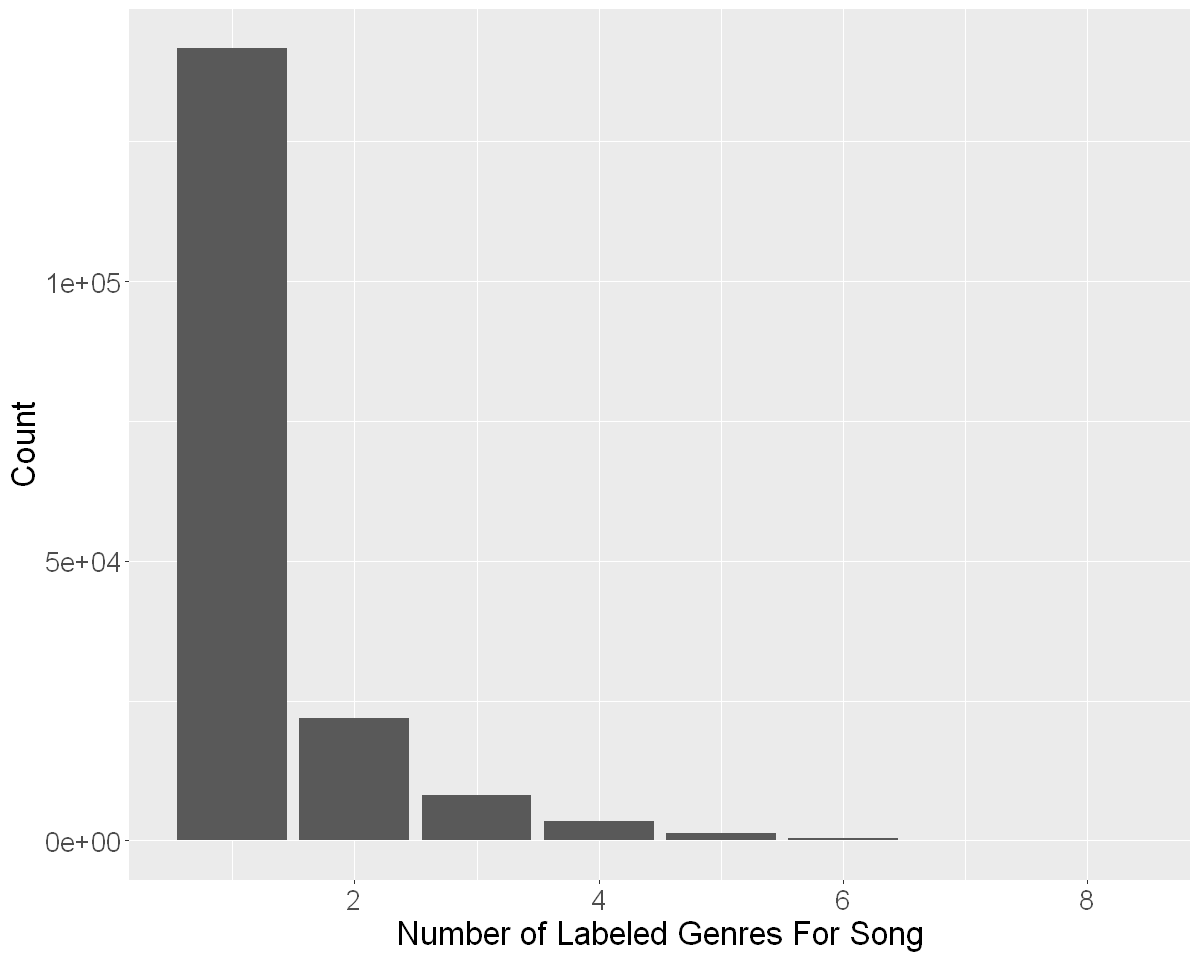

In [166]:
song_copies <- song_data |>
    group_by(track_id) |>
    summarize(copies = n()) |>
    arrange(desc(copies)) 

song_copy_counts <- song_copies |>
    group_by(copies) |>
    summarize(count = n())

num_unique_track_ids <- song_copy_counts |>
    select(count) |>
    pull() |>
    sum()

song_copy_counts
num_unique_track_ids

ggplot(song_copy_counts, aes(copies, count))+
    geom_bar(stat = "identity")+
    labs(x = "Number of Labeled Genres For Song", y = "Count")+
    theme(text = element_text(size = 20))

There are a total of 176,774 unique tracks in this dataset. Of those tracks, 141,650 (a vast majority) fall under a single genre classification while the rest appear in as many as eight different genres! Here we find a song by its unique track_id that is classified under 8 genres:

In [167]:
most_genres <- song_copies |>
    select(track_id) |>
    slice(1) |>
    pull()


multiple_genre_song <- song_data |>
    filter(track_id == most_genres) |>
    select(genre, artist_name, track_name)

multiple_genre_song

genre,artist_name,track_name
<fct>,<chr>,<chr>
Alternative,dvsn,Hallucinations
Children’s Music,dvsn,Hallucinations
Hip-Hop,dvsn,Hallucinations
Indie,dvsn,Hallucinations
Rap,dvsn,Hallucinations
Pop,dvsn,Hallucinations
R&B,dvsn,Hallucinations
Soul,dvsn,Hallucinations


Having songs that fall into multiple genres will complicate the classification process and may give a more optimistic view of model accuracy. For this project, we decide to only use songs with one assigned genre.

In [168]:
multi_genre_songs <- song_copies |>
    filter(copies > 1) |>
    select(track_id) |>
    pull()

song_data <- song_data |>
    filter(!(track_id %in% multi_genre_songs))

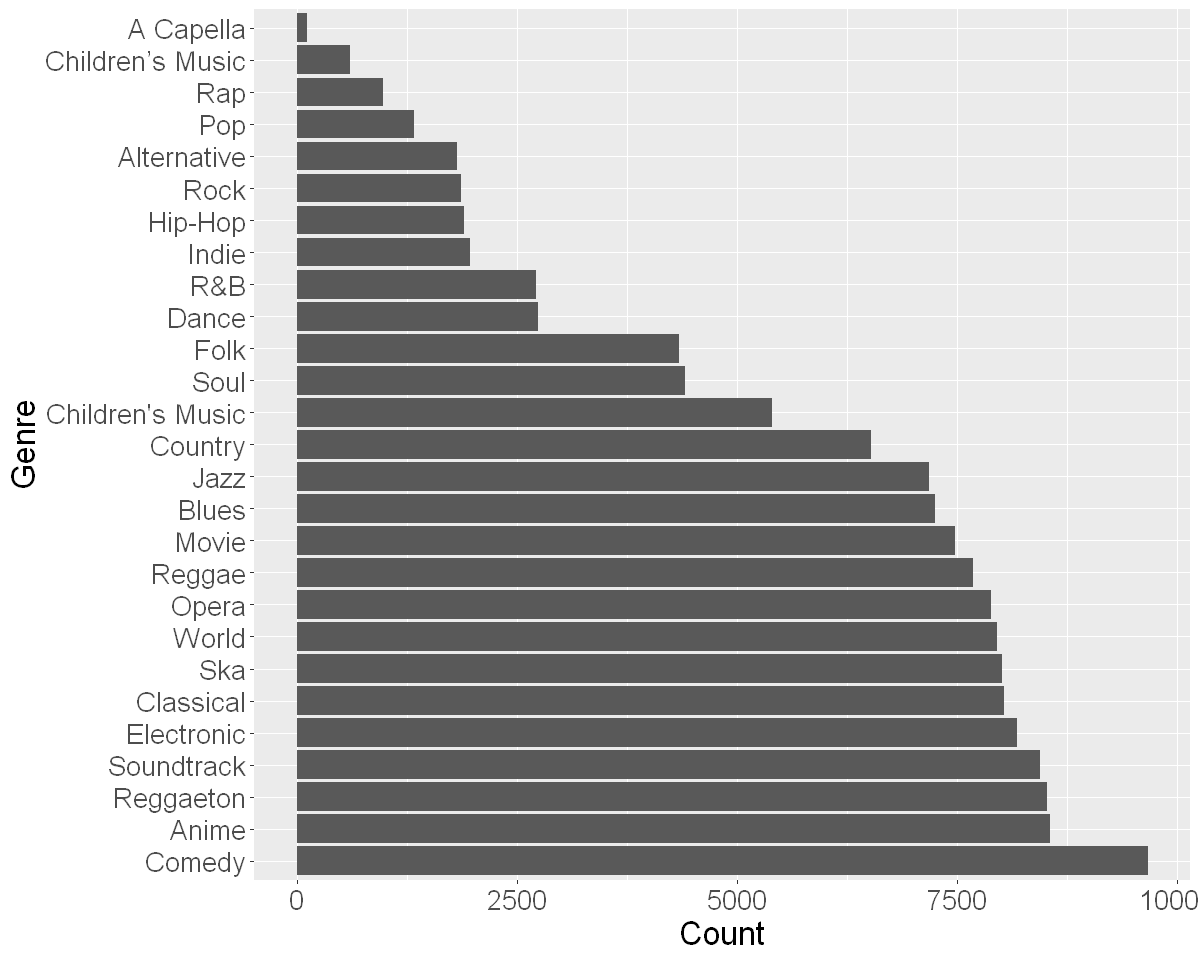

In [169]:
options(repr.plot.height = 8, repr.plot.width = 10)

genre_plot <- song_data |>
    group_by(genre) |>
    summarize(count = n()) |>
    ggplot(aes(reorder(genre, -count), count))+
        geom_bar(stat = "identity")+
        labs(x = "Genre", y = "Count")+
        coord_flip()+
        theme(text = element_text(size = 20))

genre_plot

As seen on the last graph there is a problem regarding the genre of Children's Music as it seems to be classified into two genreas because of the apostrophy.One is Children's Music and the other is Children’s Music, we will correct this and put both of them under the same catgeory as tehy should belong

In [172]:
#Checking how many songs and genrea are in teh data set
Original_number_Of_songs <-nrow(song_data)
Original_number_Of_Genere <- song_data |>
                            group_by(genre) |>
                            summarize(count = n()) |> 
                            nrow()
print(paste("Number of Rows of the original data set: ", Original_number_Of_songs))
print(paste("Number of genres of the original Data set: ", Original_number_Of_Genere))
#We select one of the two genre classify as children songs and mutate them to the other name of Children's Music
selectingOneTypeOfChildrensSong <- song_data |>
                                filter(genre=="Children’s Music") |>
                                mutate(genre="Children's Music")

#We delete that said genre from the original data set
song_data <- song_data |> 
            filter(genre!="Children’s Music")


[1] "Number of Rows of the original data set:  141650"
[1] "Number of genres of the original Data set:  27"


In [173]:
#We merge both of them into one data set
song_data <-add_row(song_data, selectingOneTypeOfChildrensSong)

#Confirm they have the same number of rows
New_number_of_songs<-nrow(song_data)
print(paste("Number of Rows of the new data set: ", New_number_of_songs))
#Confirm the have one genre less
New_number_Of_Genere <- song_data |>
                            group_by(genre) |>
                            summarize(count = n()) |>
                            nrow()
print(paste("Number of genres of the new Data set: ", New_number_Of_Genere))

[1] "Number of Rows of the new data set:  141650"
[1] "Number of genres of the new Data set:  26"


### TODO: 
1. Yes, we should either undersample, or try to use any method to balace the data, or balance the data using another function
2. They were part of the same genra but using different quotations one was using ' and the other ’, correctly change that
3. Yes, I think we should remove them like you did.

### Training / Testing Split

**Please Don't Forget To Run This**

In [96]:
set.seed(1738)

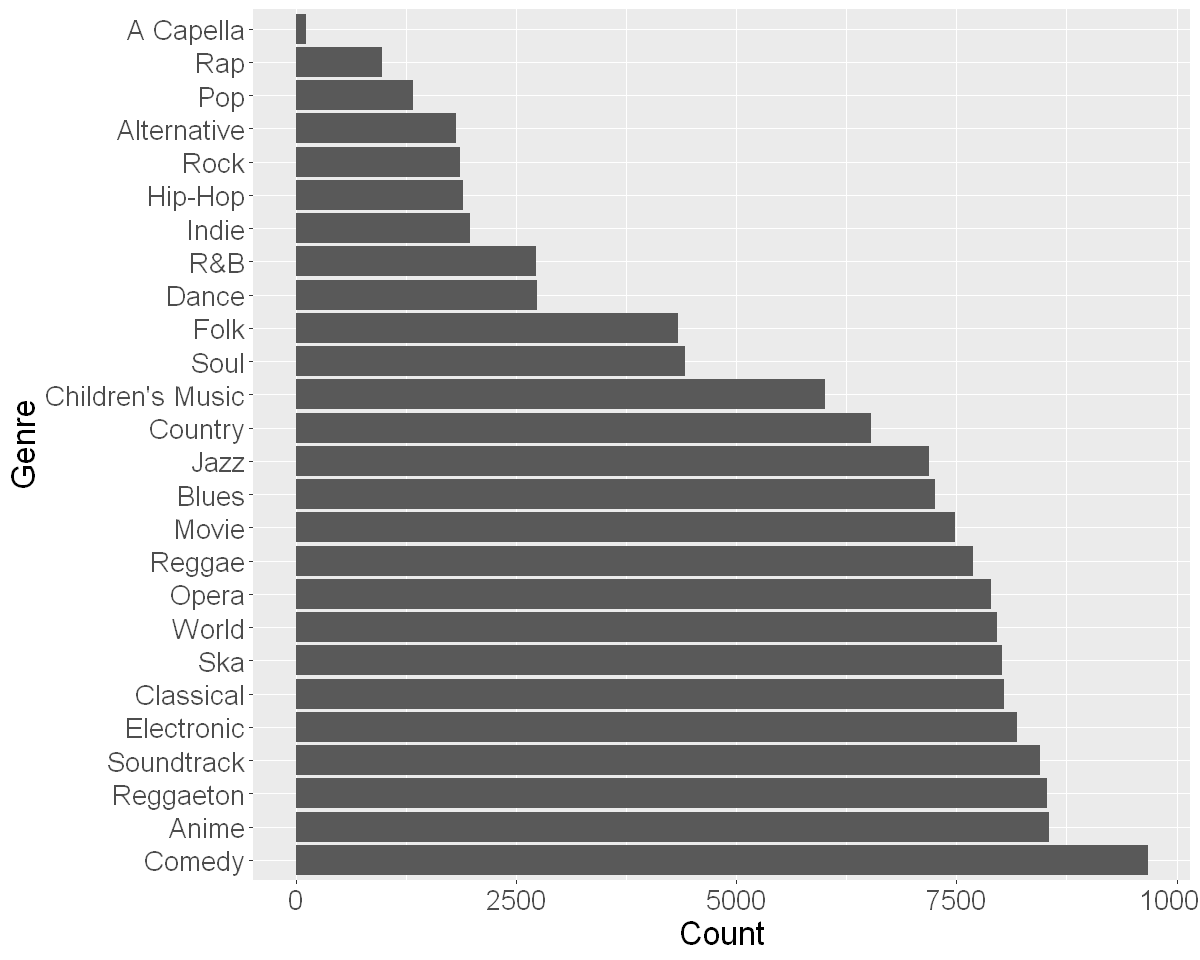

In [180]:
genre_plot <- song_data |>
    group_by(genre) |>
    summarize(count = n()) |>
    ggplot(aes(reorder(genre, -count), count))+
        geom_bar(stat = "identity")+
        labs(x = "Genre", y = "Count")+
        coord_flip()+
        theme(text = element_text(size = 20))
genre_plot

As seen here there seems to be a problem regarding the ratio of many of the genrea such as alcapella. This problem is called inbalance and will make the model correctly uncatageorize many observations due to not having enough points, to correct that we need to make make the percenteage of this points more important in the data set using step_upsample

In [217]:
song_split <- initial_split(song_data, prop = 0.75, strata = genre)
song_train <- training(song_split)
song_test <- testing(song_split)

Warning message:
"Too little data to stratify.
* Resampling will be unstratified."


### Descriptive Table (training data)

### Visualization (training data)

Very few A Capella: should we still include this genre?
And why are there 2 Children's Music categories???